In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 8,6
import seaborn as sb
sb.set()
import yfinance as yf

Stock price data

In [2]:
amzn = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed


In [3]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


Rate of return in separate series

In [4]:
amzn_return = round(np.log(amzn.Close).diff()*100,2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
1997-05-16   -12.45
1997-05-19    -1.21
1997-05-20    -4.36
1997-05-21   -13.63
1997-05-22    -2.21
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

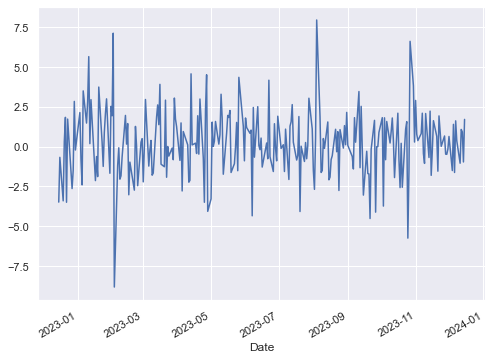

In [5]:
amzn_return[-252:].plot()

In [6]:
amzn_return.describe()

count    6691.000000
mean        0.109643
std         3.528601
min       -28.460000
25%        -1.330000
50%         0.050000
75%         1.470000
max        29.620000
Name: Close, dtype: float64

In [7]:
from scipy import stats

In [8]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi= minmax
std = var**.5

In [9]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)
stats.describe(x)

DescribeResult(nobs=6691, minmax=(-14.574756395864625, 12.3890642774268), mean=0.08129199472640383, variance=12.269567147082263, skewness=0.029029081698054186, kurtosis=0.038730826206116564)

(array([   3.,    3.,   23.,   67.,  233.,  554.,  973., 1314., 1331.,
        1052.,  638.,  326.,  130.,   37.,    7.]),
 array([-14.5747564 , -12.77716835, -10.97958031,  -9.18199226,
         -7.38440422,  -5.58681617,  -3.78922813,  -1.99164008,
         -0.19405204,   1.60353601,   3.40112405,   5.1987121 ,
          6.99630014,   8.79388819,  10.59147623,  12.38906428]),
 <BarContainer object of 15 artists>)

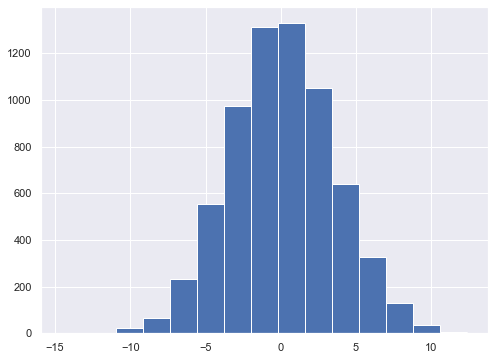

In [10]:
plt.hist(x, bins=15)

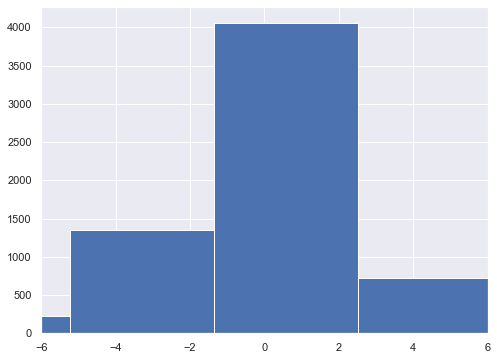

In [11]:
plt.hist(amzn_return, bins = 15)
plt.xlim(-6,6);

In [12]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN:{amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

Test statistic              p-value
     ------------------------------
x:             0.68          0.4963
AMZN:        33.56          0.0000


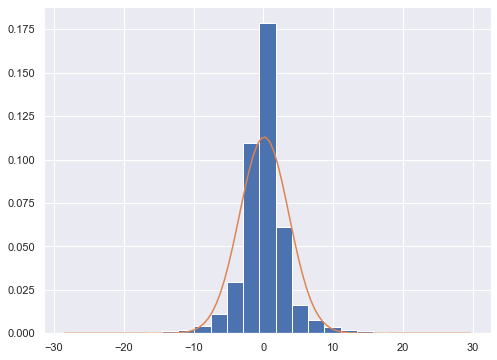

In [13]:
plt.hist(amzn_return, bins = 25, edgecolor='w', density=True)
data = np.linspace(mini, maxi,100)
plt.plot(data, norm.pdf(data, mean,std));

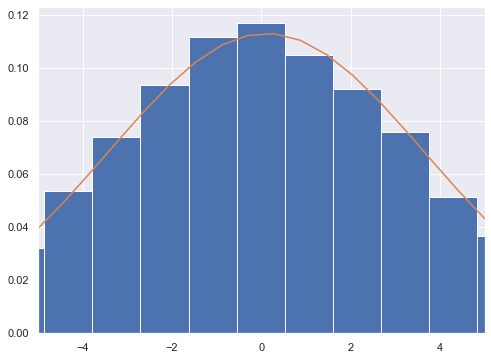

In [14]:
plt.hist(x, bins=25, density= True)
b = np.linspace(mini, maxi,100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

In [16]:
stats.ttest_1samp(amzn_return.sample(252),0,alternative='two-sided')

Ttest_1sampResult(statistic=0.3550411358595953, pvalue=0.7228569220834361)